In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sb

In [217]:
twitter = pd.read_csv('sentiment_results  (1).csv')
youtube = pd.read_csv('sentimentYoutubeComments (1).csv')
reddit = pd.read_csv('sentiment_results_reddit (2).csv')
stock = pd.read_csv('04. TSLA_2023-04-10-2025-04-08.csv')

In [197]:
twitter['date'] = pd.to_datetime(twitter['orig_tweet_created_at'])
reddit['date'] = pd.to_datetime(reddit['created_utc'])
youtube['date'] = pd.to_datetime(youtube['published'])

In [198]:
fmt = '%Y-%m-%d'
twitter['date'] = twitter['date'].apply(lambda x: dt.datetime.strptime(x.strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S').strftime(fmt))
reddit['date'] = reddit['date'].apply(lambda x: dt.datetime.strptime(x.strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S').strftime(fmt))
youtube['date'] = youtube['date'].apply(lambda x: dt.datetime.strptime(x.strftime('%Y-%m-%d %H:%M:%S'), '%Y-%m-%d %H:%M:%S').strftime(fmt))
# twitter = twitter.set_index(twitter['date'])
# reddit = reddit.set_index(reddit['date'])
# youtube = youtube.set_index(youtube['date'])

In [199]:
df_t = twitter[['orig_tweet_text', 'sentiment_score', 'sentiment_label', 'date']]
df_r = reddit[['Comment', 'sentiment_score', 'sentiment_label', 'date']]
df_y = youtube[['comment', 'sentiment_label', 'sentiment_score', 'date']]
df_t = df_t.rename(columns={'orig_tweet_text':'Comment'})
df_y = df_y.rename(columns={'comment': 'Comment'})

In [200]:
a = pd.concat([df_t, df_r])
sentiment = pd.concat([a, df_y]).reset_index()

In [201]:
sentiment

,index,Comment,sentiment_score,sentiment_label,date
0,0,Memo to Elon: Here's why they're coming after ...,0.533784,negative,2023-10-01
1,1,"If an airbag is deployed, hazard lights will a...",0.756195,neutral,2023-10-03
2,2,Model Y RWD is now available in the US—startin...,0.619485,neutral,2023-10-03
3,3,CONGRATULATIONS to our awardees!🏆 Elon Musk th...,0.975588,positive,2023-10-03
4,4,Space enthusiasts!\n\nJoin #IAC2023 here NOW f...,0.781721,positive,2023-10-05
...,...,...,...,...,...
15305,2164,It's not that hard to confuse any car with a T...,0.472634,neutral,2025-04-07
15306,2165,For those yapping about how it is inconvenient...,0.513970,positive,2025-04-07
15307,2166,"This guy is a tard however, Most everyone who...",0.604330,negative,2025-04-07
15308,2167,I’ve seen stickers that say things like: “I bo...,0.674819,positive,2025-04-07


In [202]:
df_t['date'] = pd.to_datetime(df_t['date'])
df_y['date'] = pd.to_datetime(df_y['date'])
df_r['date'] = pd.to_datetime(df_r['date'])


<ipython-input-202-3d3d6ee4e6cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['date'] = pd.to_datetime(df_r['date'])


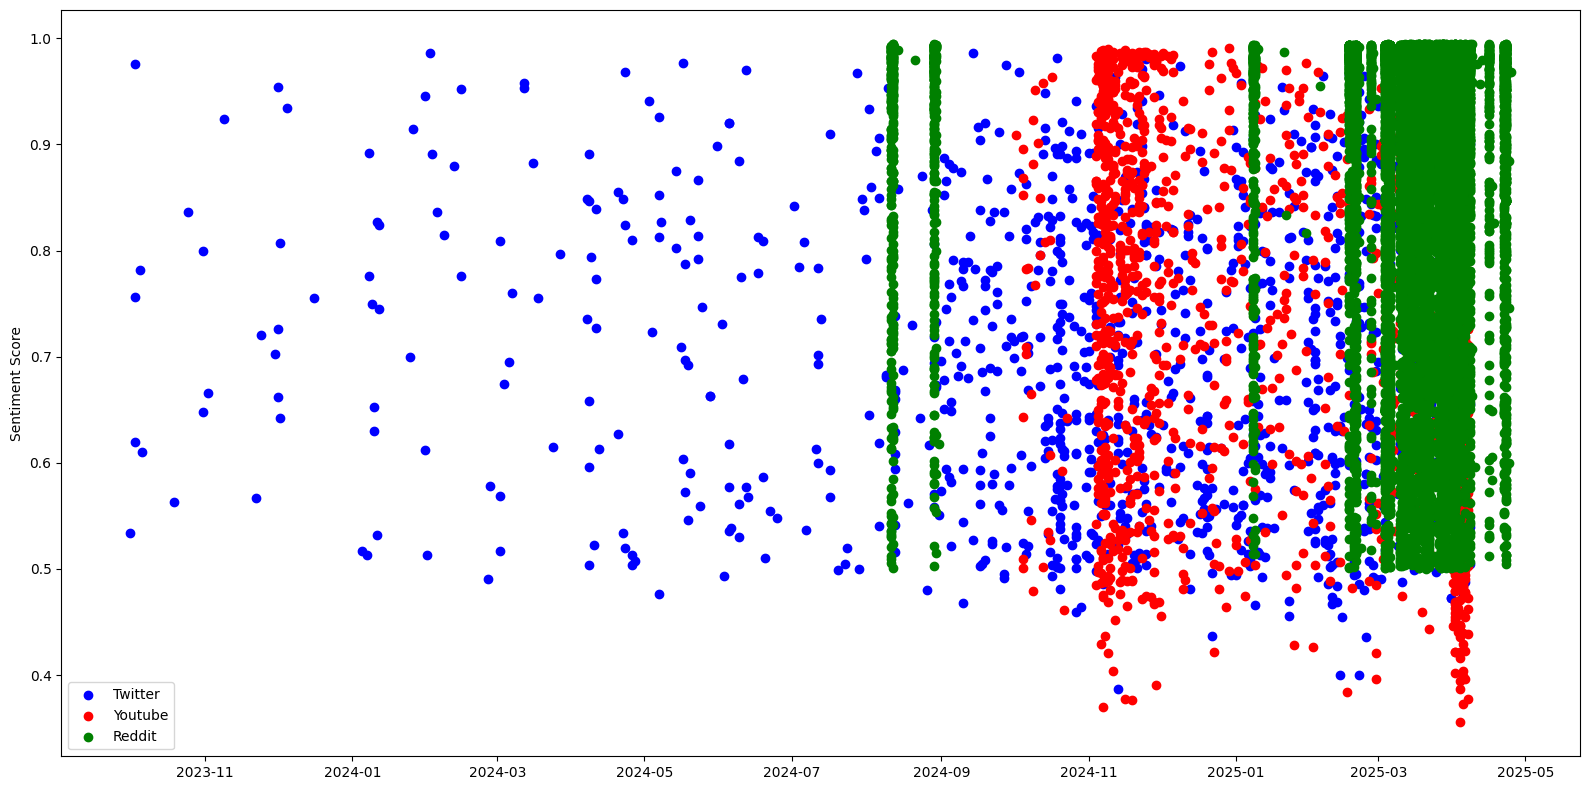

In [203]:
plt.figure(figsize=(16,8))
plt.scatter(df_t['date'], df_t['sentiment_score'], color= 'blue', label='Twitter')
plt.scatter(df_y['date'], df_y['sentiment_score'], color='red', label='Youtube')
plt.scatter(df_r['date'], df_r['sentiment_score'], color='green', label='Reddit')
plt.ylabel('Sentiment Score')
plt.tight_layout()
plt.legend()
plt.show()

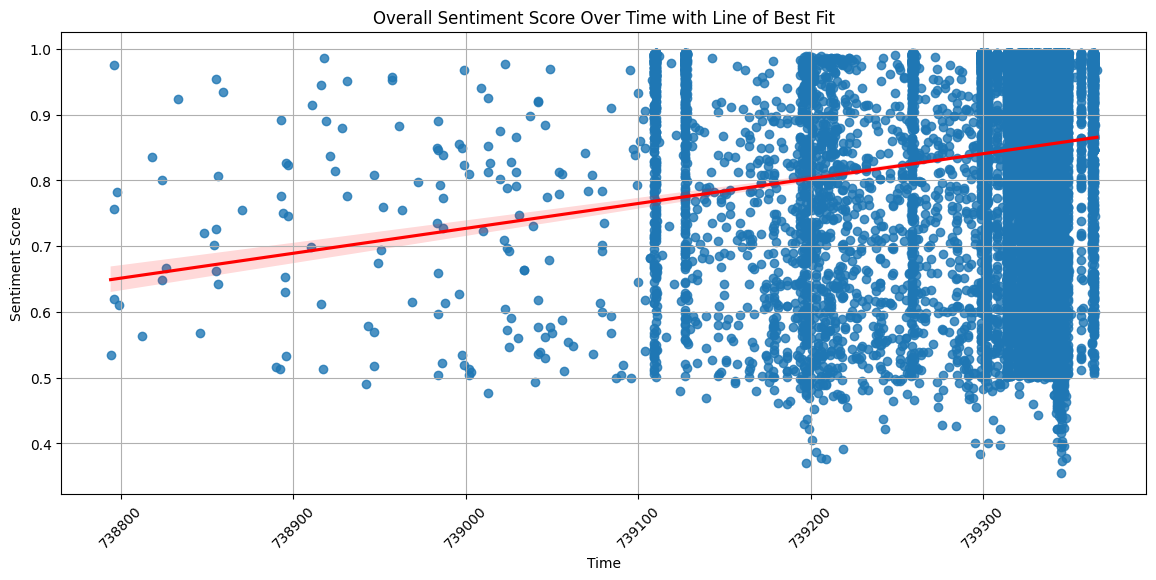

In [211]:
sentiment['date'] = pd.to_datetime(sentiment['date'])
sentiment['date_ordinal'] = sentiment['date'].apply(lambda date: date.toordinal())# Create scatter plot + line of best fit
plt.figure(figsize=(14,6))

# scatter + line of best fit, use 'date_numeric' for regression
sb.regplot(
    data=sentiment,
    x='date_ordinal',  # Use the numerical representation of date
    y='sentiment_score',
    line_kws={'color':'red'}
)

plt.title('Overall Sentiment Score Over Time with Line of Best Fit')
plt.xlabel('Time')  # Label the x-axis as 'Date'
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)


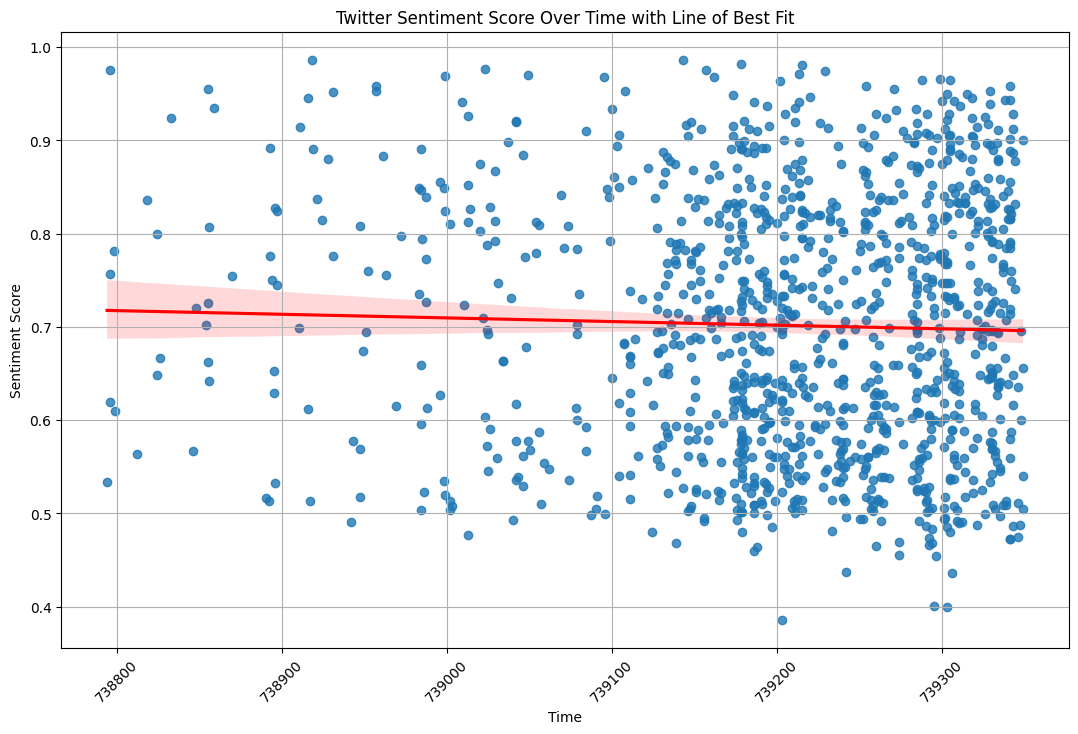

In [212]:
df_t['date'] = pd.to_datetime(df_t['date'])
df_t['date_ordinal'] = df_t['date'].apply(lambda date: date.toordinal())# Create scatter plot + line of best fit
plt.figure(figsize=(13,8))
sb.regplot(
    data=df_t,
    x='date_ordinal',
    y='sentiment_score',
    line_kws={'color':'red'}
)
plt.title('Twitter Sentiment Score Over Time with Line of Best Fit')
plt.xlabel('Time')  # Label the x-axis as 'Date'
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)


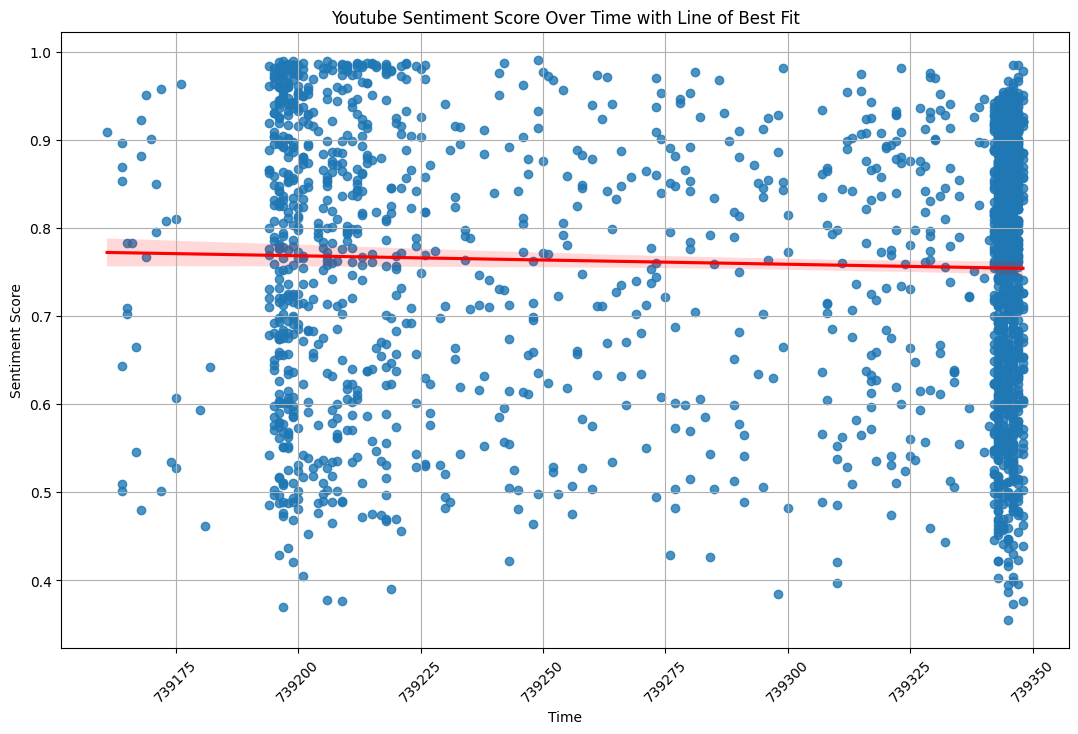

In [215]:
df_y['date'] = pd.to_datetime(df_y['date'])
df_y['date_ordinal'] = df_y['date'].apply(lambda date: date.toordinal())# Create scatter plot + line of best fit
plt.figure(figsize=(13,8))
sb.regplot(
    data=df_y,
    x='date_ordinal',
    y='sentiment_score',
    line_kws={'color':'red'}
)
plt.title('Youtube Sentiment Score Over Time with Line of Best Fit')
plt.xlabel('Time')  # Label the x-axis as 'Date'
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

<ipython-input-216-03e98e588a03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['date'] = pd.to_datetime(df_r['date'])
<ipython-input-216-03e98e588a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['date_ordinal'] = df_r['date'].apply(lambda date: date.toordinal())# Create scatter plot + line of best fit


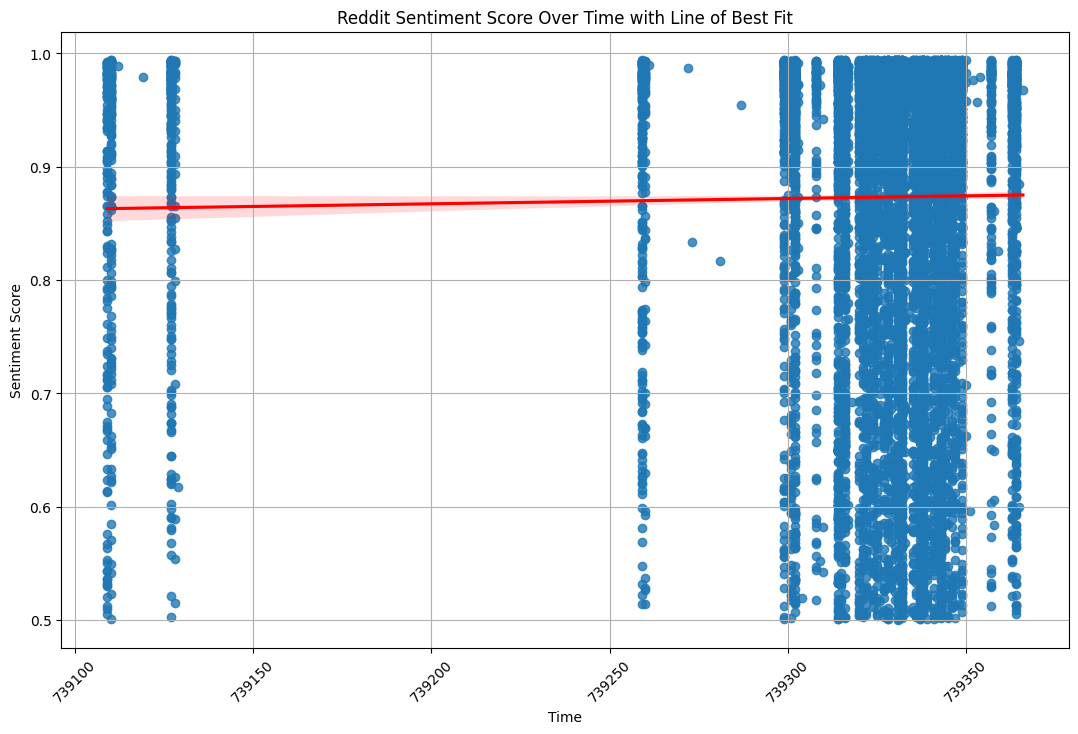

In [216]:
df_r['date'] = pd.to_datetime(df_r['date'])
df_r['date_ordinal'] = df_r['date'].apply(lambda date: date.toordinal())# Create scatter plot + line of best fit
plt.figure(figsize=(13,8))
sb.regplot(
    data=df_r,
    x='date_ordinal',
    y='sentiment_score',
    line_kws={'color':'red'}
)
plt.title('Reddit Sentiment Score Over Time with Line of Best Fit')
plt.xlabel('Time')  # Label the x-axis as 'Date'
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)

In [320]:
s = stock[['date', 'vwap']]
sen = sentiment[['sentiment_score', 'date']]

In [321]:
sen = sen.groupby('date')['sentiment_score'].mean().reset_index()
sen

,date,sentiment_score
0,2023-10-01,0.533784
1,2023-10-03,0.783756
2,2023-10-05,0.781721
3,2023-10-06,0.610331
4,2023-10-19,0.563440
...,...,...
348,2025-04-18,0.825974
349,2025-04-22,0.867586
350,2025-04-23,0.855906
351,2025-04-24,0.743415


In [322]:
s['date'] = pd.to_datetime(s['date'])
s = s[s['date'] >= '2023-10-01'].reset_index()
s

<ipython-input-322-9c33625d0c86>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s['date'] = pd.to_datetime(s['date'])
<ipython-input-322-9c33625d0c86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s['date'] = pd.to_datetime(s['date'])


,index,date,vwap
0,121,2023-10-02,249.4017
1,122,2023-10-03,247.3658
2,123,2023-10-04,255.8023
3,124,2023-10-05,259.6693
4,125,2023-10-06,256.3231
...,...,...,...
376,497,2025-04-02,273.6954
377,498,2025-04-03,268.1336
378,499,2025-04-04,244.8183
379,500,2025-04-07,230.0561


In [323]:
sen = sen[sen['date'] <= '2025-04-08']
sen

,date,sentiment_score
0,2023-10-01,0.533784
1,2023-10-03,0.783756
2,2023-10-05,0.781721
3,2023-10-06,0.610331
4,2023-10-19,0.563440
...,...,...
336,2025-04-04,0.826462
337,2025-04-05,0.822336
338,2025-04-06,0.836984
339,2025-04-07,0.741841


In [324]:
# senCorr = pd.merge(s, sen, on='date')
senCorr = pd.merge(s, sen, left_index=True, right_index=True)
senCorr = senCorr.drop(columns=['index', 'date_x', 'date_y'])
senCorr

,vwap,sentiment_score
0,249.4017,0.533784
1,247.3658,0.783756
2,255.8023,0.781721
3,259.6693,0.610331
4,256.3231,0.563440
...,...,...
336,386.9632,0.826462
337,381.3656,0.822336
338,368.9382,0.836984
339,368.4992,0.741841


In [325]:
corr = senCorr.corr()
corr

,vwap,sentiment_score
vwap,1.000000,0.296291
sentiment_score,0.296291,1.000000


<ipython-input-332-0091bc6c2232>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


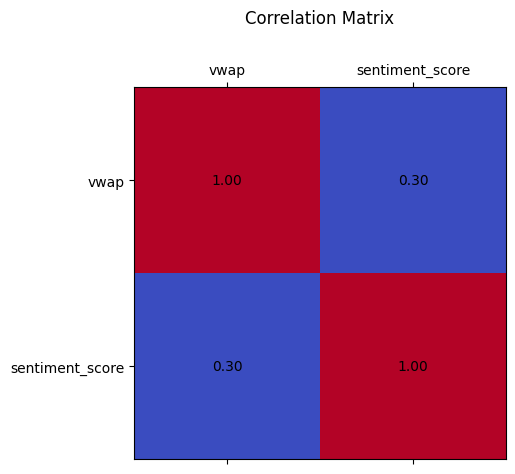

In [332]:
plt.matshow(corr, cmap='coolwarm')
for (i, j), value in np.ndenumerate(corr.values):
    plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.yticks(ticks=np.arange(len(corr.columns)), labels=corr.columns)
plt.title('Correlation Matrix', y=1.15)
plt.tight_layout()
plt.show()